In [27]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [28]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [29]:
NUM_CLASSES = 6

# Dataset reading

In [30]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [31]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [36]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [37]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
26/29 [=========================>....] - ETA: 0s - loss: 1.8058 - accuracy: 0.2305
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 2s 32ms/step - loss: 1.7920 - accuracy: 0.2375 - val_loss: 1.6568 - val_accuracy: 0.3128
Epoch 2/1000
26/29 [=========================>....] - ETA: 0s - loss: 1.6073 - accuracy: 0.3080
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 1.5992 - accuracy: 0.3110 - val_loss: 1.4923 - val_accuracy: 0.3525
Epoch 3/1000
29/29 [==============================] - ETA: 0s - loss: 1.4668 - accuracy: 0.3472
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 15ms/step - loss: 1.4668 - accuracy: 0.3472 - val_loss: 1.3585 - val_accuracy: 0.4514
Epoch 4/1000
24/29 [=======================>......] - ETA: 0s - loss: 1.3770 - accuracy: 0.387

27/29 [==========================>...] - ETA: 0s - loss: 0.8160 - accuracy: 0.6557
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.8181 - accuracy: 0.6566 - val_loss: 0.5648 - val_accuracy: 0.8468
Epoch 29/1000
20/29 [===================>..........] - ETA: 0s - loss: 0.8202 - accuracy: 0.6621
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.8090 - accuracy: 0.6650 - val_loss: 0.5451 - val_accuracy: 0.8509
Epoch 30/1000
18/29 [=================>............] - ETA: 0s - loss: 0.8026 - accuracy: 0.6615
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.7979 - accuracy: 0.6685 - val_loss: 0.5396 - val_accuracy: 0.8574
Epoch 31/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.7767 - accuracy: 0.6978
Epoch

Epoch 55/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.6715 - accuracy: 0.7436
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.6698 - accuracy: 0.7441 - val_loss: 0.3788 - val_accuracy: 0.9068
Epoch 56/1000
25/29 [========================>.....] - ETA: 0s - loss: 0.6555 - accuracy: 0.7437
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.6572 - accuracy: 0.7439 - val_loss: 0.3749 - val_accuracy: 0.8995
Epoch 57/1000
26/29 [=========================>....] - ETA: 0s - loss: 0.6480 - accuracy: 0.7431
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 14ms/step - loss: 0.6573 - accuracy: 0.7387 - val_loss: 0.3701 - val_accuracy: 0.9036
Epoch 58/1000
21/29 [====================>.........] - ETA: 0s - loss: 0.6720 - accuracy

Epoch 82/1000
25/29 [========================>.....] - ETA: 0s - loss: 0.6165 - accuracy: 0.7647
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 15ms/step - loss: 0.6142 - accuracy: 0.7660 - val_loss: 0.3256 - val_accuracy: 0.9214
Epoch 83/1000
26/29 [=========================>....] - ETA: 0s - loss: 0.6087 - accuracy: 0.7719
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.6087 - accuracy: 0.7728 - val_loss: 0.3394 - val_accuracy: 0.9165
Epoch 84/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.6095 - accuracy: 0.7690
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.6076 - accuracy: 0.7698 - val_loss: 0.3207 - val_accuracy: 0.9295
Epoch 85/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.6230 - accuracy

Epoch 109/1000
20/29 [===================>..........] - ETA: 0s - loss: 0.5616 - accuracy: 0.7906
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5771 - accuracy: 0.7803 - val_loss: 0.3032 - val_accuracy: 0.9303
Epoch 110/1000
21/29 [====================>.........] - ETA: 0s - loss: 0.5839 - accuracy: 0.7786
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.5867 - accuracy: 0.7768 - val_loss: 0.2809 - val_accuracy: 0.9457
Epoch 111/1000
29/29 [==============================] - ETA: 0s - loss: 0.5877 - accuracy: 0.7847
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.5877 - accuracy: 0.7847 - val_loss: 0.2925 - val_accuracy: 0.9319
Epoch 112/1000
29/29 [==============================] - ETA: 0s - loss: 0.5819 - a

Epoch 136/1000
20/29 [===================>..........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7988
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5525 - accuracy: 0.7892 - val_loss: 0.2760 - val_accuracy: 0.9335
Epoch 137/1000
20/29 [===================>..........] - ETA: 0s - loss: 0.5660 - accuracy: 0.7895
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5697 - accuracy: 0.7868 - val_loss: 0.2630 - val_accuracy: 0.9425
Epoch 138/1000
20/29 [===================>..........] - ETA: 0s - loss: 0.5861 - accuracy: 0.7797
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5653 - accuracy: 0.7871 - val_loss: 0.2780 - val_accuracy: 0.9344
Epoch 139/1000
29/29 [==============================] - ETA: 0s - loss: 0.5739 - a

Epoch 163/1000
29/29 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.7987
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.5394 - accuracy: 0.7987 - val_loss: 0.2630 - val_accuracy: 0.9400
Epoch 164/1000
21/29 [====================>.........] - ETA: 0s - loss: 0.5430 - accuracy: 0.8069
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5390 - accuracy: 0.8052 - val_loss: 0.2650 - val_accuracy: 0.9392
Epoch 165/1000
20/29 [===================>..........] - ETA: 0s - loss: 0.5597 - accuracy: 0.8008
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5588 - accuracy: 0.7987 - val_loss: 0.2708 - val_accuracy: 0.9344
Epoch 166/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.5325 - a

Epoch 190/1000
29/29 [==============================] - ETA: 0s - loss: 0.5184 - accuracy: 0.8041
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 13ms/step - loss: 0.5184 - accuracy: 0.8041 - val_loss: 0.2721 - val_accuracy: 0.9271
Epoch 191/1000
21/29 [====================>.........] - ETA: 0s - loss: 0.5527 - accuracy: 0.7972
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5409 - accuracy: 0.8025 - val_loss: 0.2724 - val_accuracy: 0.9246
Epoch 192/1000
29/29 [==============================] - ETA: 0s - loss: 0.5491 - accuracy: 0.7868
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.5491 - accuracy: 0.7868 - val_loss: 0.2519 - val_accuracy: 0.9457
Epoch 193/1000
29/29 [==============================] - ETA: 0s - loss: 0.5399 - a

In [38]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.9360


In [39]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [40]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 172ms/step
[1.42457755e-02 9.53926146e-01 3.15150470e-02 6.03083901e-15
 3.13056662e-04 9.52452783e-10]
1


# Confusion matrix

39/39 [==============================] - 0s 4ms/step


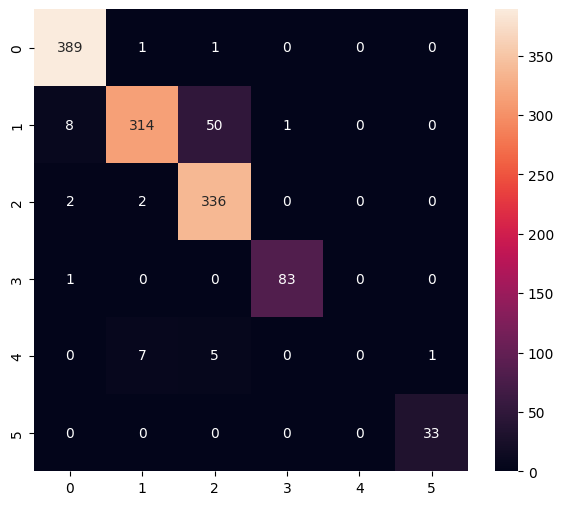

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       391
           1       0.97      0.84      0.90       373
           2       0.86      0.99      0.92       340
           3       0.99      0.99      0.99        84
           4       0.00      0.00      0.00        13
           5       0.97      1.00      0.99        33

    accuracy                           0.94      1234
   macro avg       0.79      0.80      0.80      1234
weighted avg       0.93      0.94      0.93      1234



C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [42]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [43]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmpgb0km8ow\assets


INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmpgb0km8ow\assets


6660

# Inference test

In [44]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [45]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [46]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [47]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [48]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4245789e-02 9.5392615e-01 3.1515066e-02 6.0308615e-15 3.1305608e-04
 9.5245456e-10]
1
